In [65]:
import pandas as pd

In [66]:
import psycopg2 as ps
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)


In [67]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

In [68]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [69]:
purchases1 = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

In [70]:
purchases1

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


## Importing data as a dataframe
### As csv

In [71]:
imdb_df = pd.read_csv('IMDB_Data.csv', index_col = 'Rank')

In [72]:
imdb_df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [73]:
imdb_df.head(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [74]:
imdb_df.tail(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [75]:
imdb_df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [76]:
des = imdb_df[['Description']]

In [77]:
type(des)

pandas.core.frame.DataFrame

In [78]:
des.head(2)

,Description
Rank,
1,A group of intergalactic criminals are forced ...
2,"Following clues to the origin of mankind, a te..."


In [79]:
row1 = imdb_df.loc[727]

In [80]:
row1

Title                                             Friends with Benefits
Genre                                                    Comedy,Romance
Description           A young man and woman decide to take their fri...
Director                                                     Will Gluck
Actors                Mila Kunis, Justin Timberlake, Patricia Clarks...
Year                                                               2011
Runtime (Minutes)                                                   109
Rating                                                              6.6
Votes                                                            286543
Revenue (Millions)                                                 55.8
Metascore                                                            63
Name: 727, dtype: object

In [81]:
imdb_df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

## Converting columns to lowercase

In [82]:
imdb_df.columns.str.lower()

Index(['title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime (minutes)', 'rating', 'votes', 'revenue (millions)',
       'metascore'],
      dtype='object')

## Eliminating any spaces within the column names i.e [ revenue (millions)]

In [83]:
imdb_df.columns.str.replace(' ', '')

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime(Minutes)', 'Rating', 'Votes', 'Revenue(Millions)',
       'Metascore'],
      dtype='object')

## Eliminating characters within the column names

In [84]:
imdb_df.columns.str.replace(r"\(.*\)","")
# imdb_df.columns.str.replace(' ', '')
# imdb_df.columns.str.lower()

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime ', 'Rating', 'Votes', 'Revenue ', 'Metascore'],
      dtype='object')

## Combined way to convert columns to lowercase, replace white spaces(' ') with underscore ('_') and eliminate the '()' brackets

In [85]:
imdb_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

Index(['title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime_minutes', 'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

## Importing data as Json file from the Internet (Link)

In [86]:
json_df = pd.read_json("https://jsonplaceholder.typicode.com/posts")

In [87]:
json_df.head(2)

,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...


In [88]:
json_df = json_df.set_index('id')
# json_df.set_index('id', inplace=True)

In [89]:
json_df.head(2)

,userId,title,body
id,,,
1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
2,1,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...


## Connecting to a Database(Postgres)

In [90]:
con = ps.connect("host=localhost user=postgres port=5433 password=****** dbname=inventory_management_system")

OperationalError: FATAL:  password authentication failed for user "postgres"


In [ ]:
inv_df = pd.read_sql('select * from sales ', con)

In [ ]:
inv_df

In [ ]:
inv_df.head(2)

## Importing Sql data from the Database connected

In [ ]:
pd.read_sql("select name,sum((selling_price*quantity)-(buying_price*quantity))"+
            "from sales as s join inventories as i on s.inv_id = i.id "+
            "join stock as st on st.inv_id=i.id group by i.name", con)

## Using our previous imdb_df

In [92]:
imdb_df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [93]:
imdb_df.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [94]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 133.8+ KB


## Drop All Rows with any Null/NaN/NaT Values

In [95]:
imdb_df=imdb_df.dropna()

In [97]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 1 to 1000
Data columns (total 11 columns):
Title                 838 non-null object
Genre                 838 non-null object
Description           838 non-null object
Director              838 non-null object
Actors                838 non-null object
Year                  838 non-null int64
Runtime (Minutes)     838 non-null int64
Rating                838 non-null float64
Votes                 838 non-null int64
Revenue (Millions)    838 non-null float64
Metascore             838 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 78.6+ KB


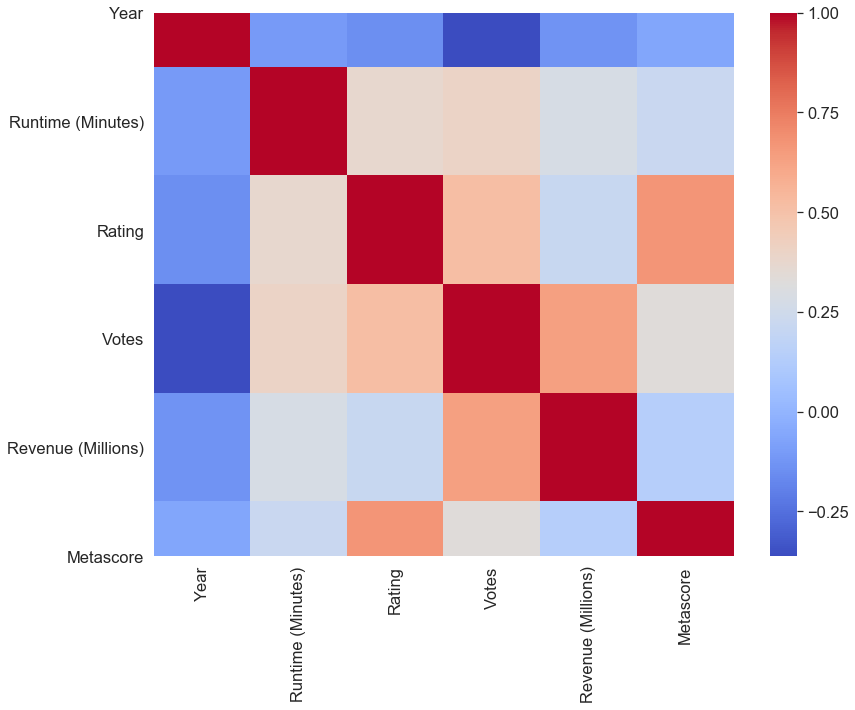

In [100]:
corr = imdb_df.corr()
_, ax = plt.subplots(figsize=(13,10))
# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

## Importing csv file from imdb folder

In [101]:
imdb_df = pd.read_csv('imdb/IMDb movies.csv')

In [102]:
imdb_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
imdb_df.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0


In [104]:
imdb_df.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,81273.000000,81273.000000,81273.000000,8.127300e+04,12722.000000,74196.000000,70286.000000
mean,1993.007210,100.565981,5.926587,9.421771e+03,55.762695,43.753194,27.992758
std,23.992284,25.320189,1.243315,5.220245e+04,17.757453,159.903568,58.708764
min,1906.000000,40.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.060000e+02,43.000000,4.000000,3.000000
50%,2002.000000,96.000000,6.100000,4.950000e+02,56.000000,9.000000,8.000000
75%,2012.000000,108.000000,6.800000,1.865000e+03,69.000000,26.000000,24.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,987.000000


In [105]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 22 columns):
imdb_title_id            81273 non-null object
title                    81273 non-null object
original_title           81273 non-null object
year                     81273 non-null int64
date_published           81273 non-null object
genre                    81273 non-null object
duration                 81273 non-null int64
country                  81234 non-null object
language                 80518 non-null object
director                 81200 non-null object
writer                   79780 non-null object
production_company       76948 non-null object
actors                   81207 non-null object
description              78843 non-null object
avg_vote                 81273 non-null float64
votes                    81273 non-null int64
budget                   22804 non-null object
usa_gross_income         15094 non-null object
worlwide_gross_income    29892 non-null object


In [108]:
imdb_df.dropna()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
488,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",In a futuristic city sharply divided between t...,8.3,148396,DEM 6000000,$ 1236166,$ 1349711,98.0,471.0,194.0
1005,tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",8.5,152716,$ 1500000,$ 19181,$ 32609,99.0,270.0,120.0
2336,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,8.5,197969,$ 1500000,$ 163577,$ 445226,96.0,262.0,146.0
2687,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",Exiled into the dangerous forest by her wicked...,7.6,168735,$ 1499000,$ 184925486,$ 184925486,95.0,229.0,166.0
3100,tt0031381,Gone with the Wind,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",A manipulative woman and a roguish man conduct...,8.1,269664,$ 3977000,$ 200852579,$ 402352579,97.0,808.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80665,tt8772262,Midsommar,Midsommar,2019,2019-07-03,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,...,"Florence Pugh, Jack Reynor, Vilhelm Blomgren, ...",A couple travels to Sweden to visit a rural ho...,7.2,78830,$ 10000000,$ 27426361,$ 41123770,72.0,1454.0,365.0
80858,tt9024106,Unplanned,Unplanned,2019,2019-10-04,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",...,"Ashley Bratcher, Brooks Ryan, Robia Scott, Jar...",All Abby Johnson ever wanted to do was help wo...,5.8,10783,$ 6000000,$ 19005109,$ 19320481,10.0,531.0,32.0
80908,tt9082020,Cold Blood Legacy,Cold Blood Legacy,2019,2019-05-15,"Action, Thriller",91,"France, Ukraine, Belgium","French, English",Frédéric Petitjean,...,"Jean Reno, Sarah Lind, Joe Anderson, David Gya...",A hit-man lives isolated in a cabin at the edg...,4.5,2193,$ 2700000,$ 5083,$ 1009888,25.0,72.0,26.0
80946,tt9134216,Playing with Fire,Playing with Fire,2019,2019-11-08,"Comedy, Family",96,USA,English,Andy Fickman,...,"John Cena, Keegan-Michael Key, John Leguizamo,...",A crew of rugged firefighters meet their match...,4.5,1067,$ 29900000,$ 18847824,$ 21788746,24.0,49.0,16.0


In [111]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 22 columns):
imdb_title_id            81273 non-null object
title                    81273 non-null object
original_title           81273 non-null object
year                     81273 non-null int64
date_published           81273 non-null object
genre                    81273 non-null object
duration                 81273 non-null int64
country                  81234 non-null object
language                 80518 non-null object
director                 81200 non-null object
writer                   79780 non-null object
production_company       76948 non-null object
actors                   81207 non-null object
description              78843 non-null object
avg_vote                 81273 non-null float64
votes                    81273 non-null int64
budget                   22804 non-null object
usa_gross_income         15094 non-null object
worlwide_gross_income    29892 non-null object


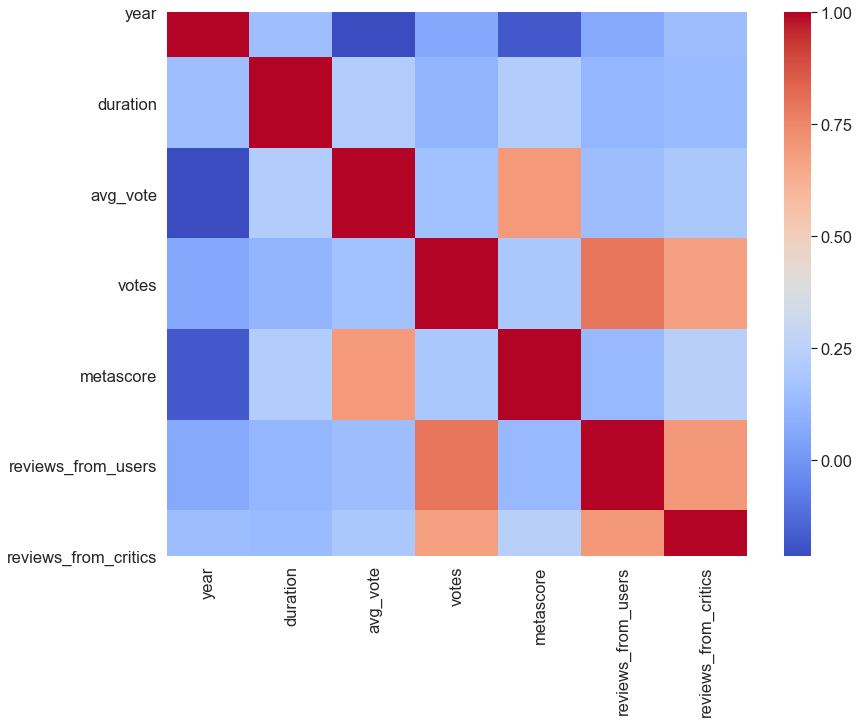

In [112]:
corr = imdb_df.corr()
_, ax = plt.subplots(figsize=(13,10))
# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

In [114]:
df = pd.read_csv('IMDB Dataset.csv')

In [115]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
